In [1]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
'''
@Time    :   08/10/2023 23:17:28
@Author  :   Marty 
'''

# Pulizia
from IPython import get_ipython
get_ipython().magic('clear')
get_ipython().magic('reset -f')

#Librerie
from IPython.display import display, Markdown
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 70

import math 
import pandas as pd
import os

/var/folders/gs/p2p59ns16hlgpqv_027665gm0000gn/T/ipykernel_4846/2279430857.py:10: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('clear')
/var/folders/gs/p2p59ns16hlgpqv_027665gm0000gn/T/ipykernel_4846/2279430857.py:11: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -f')


## **LHR and Flux**

<Figure size 2100x1050 with 0 Axes>

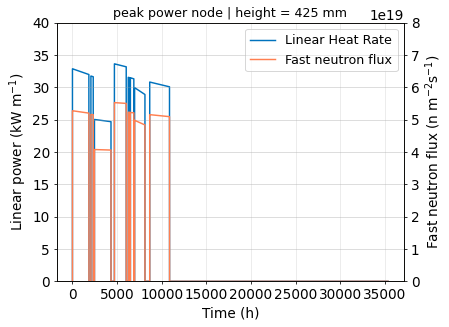

In [41]:
lhr = np.loadtxt('SD_iFGDcoeff = 1/time/section 3/lhr.dat', converters={1: lambda s: s.replace(b'D', b'E')})
flux = np.loadtxt('SD_iFGDcoeff = 1/time/section 3/flux.dat', converters={1: lambda s: s.replace(b'D', b'E')})

plt.figure(1, figsize=[30,15])
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(lhr[:,0], lhr[:,1], color='#0072bd',label='Linear Heat Rate' ,linewidth=1.5)
ax2.plot(flux[:,0], flux[:,1], color='#FF7F50',label='Fast neutron flux',linewidth=1.5)
ax1.set_xlabel('Time (h)',fontsize=14)
ax1.set_ylabel('Linear power (kW m$^{-1}$)',fontsize=14)
ax1.tick_params(axis="y", labelsize=14)
ax2.set_ylabel('Fast neutron flux (n m$^{-2}$s$^{-1}$)',fontsize=14)
ax2.tick_params(axis="y",labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.set_ylim(0, 40)
ax2.set_ylim(0, 8e19)
ax2.yaxis.get_offset_text().set_fontsize(14) 
plt.rcParams['figure.edgecolor'] = '#050402'
plt.rcParams['axes.edgecolor'] = '#050402'
plt.title('peak power node | height = 425 mm',fontsize=13)
ax1.grid(which='both', alpha=0.3)
ax2.grid(which='both', alpha=0.3)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2,loc="best", fontsize=13)
plt.savefig('LHR and Flux.pdf')

## **Radial Xenon**

In [47]:
#Import Excel
data=pd.read_excel("SUPERFACT data.xlsx", sheet_name = 'SF16')
experimental_coordinate  = pd.DataFrame(data.loc[:,'experimental_radius'])[0:27]
experimental_xenon  = pd.DataFrame(data.loc[:,'experimental_xenon'])[0:27]
radius1 = pd.DataFrame(data.loc[:,'radius1'])[0:43]                              #TU 2020 + thermal	
xenon1  = pd.DataFrame(data.loc[:,'xe1'])[0:43]
radius2 = pd.DataFrame(data.loc[:,'radius2'])[0:43]                              #TU 2020 + mechanical	
xenon2  = pd.DataFrame(data.loc[:,'xe2'])[0:43]
radius3 = pd.DataFrame(data.loc[:,'radius3'])[0:43]                              #TU 2020 // SCIANTIX 1.0 and grain growth spento
xenon3  = pd.DataFrame(data.loc[:,'xe new'])[0:43]

#Import TU 
# sd = np.loadtxt(open('SD_iFGDcoeff = 1/xenon.dat','rt').readlines()[4:4+43], converters={1: lambda s: s.replace(b'D', b'E')} )
# cylinder = np.loadtxt(open('TU - SCIANTIX 2.0 - cylinder/xenon.dat','rt').readlines()[4:4+43], converters={1: lambda s: s.replace(b'D', b'E')} )
# xVars_sd = sd[0:43,0]/1000       #Posizione assiale
# yVars_sd = sd[0:43,1]

# xVars_cylinder = cylinder[0:43,0]/1000       #Posizione assiale
# yVars_cylinder = cylinder[0:43,1]
# # # ushakov_cladding_temperature_IPS = ushakov_IPS.loc[:,'Cladding outer temperature']

## **Confronto dei coefficienti di diffusione**
La variabile plottata si trova in radius/Xe-concentration(wt%) e non xe-concentration($\mu mol/mm^3$)

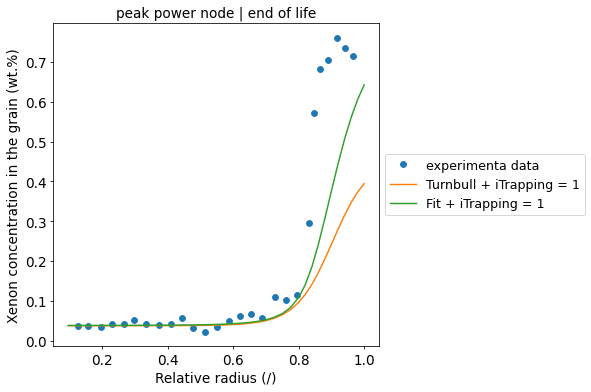

In [53]:
slice=43
salto=4+slice 
sd_turnbull = np.loadtxt(open('SD_iFGDcoeff = 1/radius/section 4/xenon.dat','rt').readlines()[4:4+43], converters={1: lambda s: s.replace(b'D', b'E')} )
sd_matzke = np.loadtxt(open('SD_iFGDcoeff = 2/radius/section 4/xenon.dat','rt').readlines()[4:4+43], converters={1: lambda s: s.replace(b'D', b'E')} )
sd_fit = np.loadtxt(open('SD_iFGDcoeff = 8/radius/section 4/xenon.dat','rt').readlines()[4:4+43], converters={1: lambda s: s.replace(b'D', b'E')} )

plt.figure(figsize=(6,6))
plt.plot(experimental_coordinate, experimental_xenon, 'o', label='experimenta data')
plt.plot((sd_turnbull[:,0])/sd_turnbull[-1,0],sd_turnbull[:,1], label = 'Turnbull + iTrapping = 1')
plt.plot((sd_matzke[:,0])/sd_matzke[-1,0],sd_matzke[:,1], label = 'Matzke + iTrapping = 1')
plt.plot((sd_fit[:,0])/sd_fit[-1,0],sd_fit[:,1], label = 'Fit + iTrapping = 1')

#plt.plot(radius1,xenon1, label='TU standalone 2020 + thermal properties \n developed within INSPYRE \n (thermal conductivity and melting temperature)')
#plt.plot(radius2,xenon2, label='TU standalone 2020 + mechanical properties \n developed within INSPYRE \n (Young modulus, thermal expansion)')
#plt.plot(radius3,xenon3, label='TU 2020 // SCIANTIX 1.0 with grain growth model = 0')

# plt.plot(xVars_sd/xVars_sd[-1],yVars_sd, label='TU (v1m4j22)// SCIANTIX 2.0 - spectral diffusion + iFGD = matzke + itrp = 1')
# plt.plot(xVars_cylinder/xVars_cylinder[-1],yVars_cylinder, label='TU (v1m4j22)// SCIANTIX 2.0 - ROM cylinder + iFGD = matzke + itrp = 1')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Relative radius (/)', fontsize=14)
plt.ylabel('Xenon concentration in the grain (wt.%)', fontsize=14)
plt.title('peak power node | end of life',fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=False, ncol=1, fontsize=13)
plt.savefig('plot/diffusion coefficients.pdf', bbox_inches="tight")

#print(xVars_sd[-1])

## **Columnar grain diameter**

In [7]:
#Import Excel
data=pd.read_excel("SUPERFACT data.xlsx", sheet_name = 'SF16')
experimental_height  = pd.DataFrame(data.loc[:,'experimental_height (mm)'])[0:3]
experimental_diameter  = pd.DataFrame(data.loc[:,'experimental_diameter (mm)'])[0:3]
height1 = pd.DataFrame(data.loc[:,'height1 (mm)'])[0:11]                              #TU 2020 new	
diameter1  = pd.DataFrame(data.loc[:,'diameter1 (mm)'])[0:11]
height2 = pd.DataFrame(data.loc[:,'height2 (mm)'])[0:11]                              #TU 2020 // sciantix 1.0	
diameter2  = pd.DataFrame(data.loc[:,'diameter2 (mm)'])[0:11]

# #Import TU 
# sd = np.loadtxt(open('TU - SCIANTIX 2.0 - SD/columnar radius.dat','rt').readlines()[3:3+10], converters={1: lambda s: s.replace(b'D', b'E')} )
# cylinder = np.loadtxt(open('TU - SCIANTIX 2.0 - cylinder/columnar radius.dat','rt').readlines()[3:3+10], converters={1: lambda s: s.replace(b'D', b'E')} )
# xVars_sd = sd[:,0]       #Posizione assiale
# yVars_sd = sd[:,1]

# xVars_cylinder = cylinder[:,0]       #Posizione assiale
# yVars_cylinder = cylinder[:,1]

0.4629629629629629


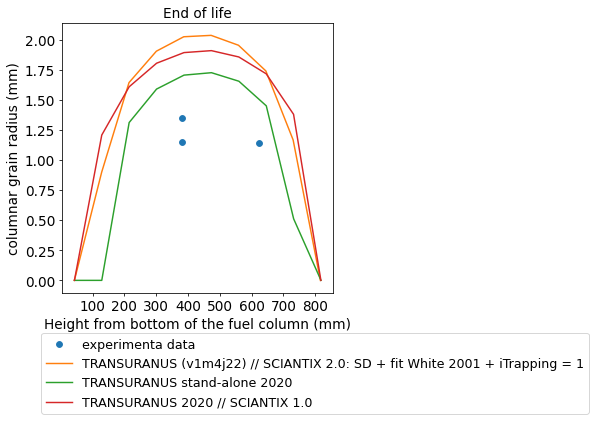

In [45]:
slice = 10
salto = 3+10
sd_fit = np.loadtxt(open('SD_iFGDcoeff = 8/axial/columnar radius.dat','rt').readlines()[3:3+10], converters={1: lambda s: s.replace(b'D', b'E')} )

plt.figure(figsize=(5,5))
plt.plot(experimental_height, experimental_diameter/2, 'o', label='experimenta data')
plt.plot(sd_fit[:,0],sd_fit[:,1], label = 'TRANSURANUS (v1m4j22) // SCIANTIX 2.0: SD + fit White 2001 + iTrapping = 1')
plt.plot(height1,diameter1/2, label='TRANSURANUS stand-alone 2020')
plt.plot(height2,diameter2/2, label='TRANSURANUS 2020 // SCIANTIX 1.0')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Height from bottom of the fuel column (mm)', fontsize=14)
plt.ylabel('columnar grain radius (mm)', fontsize=14)
plt.title('End of life',fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(-0.1, -0.3), fancybox=True, shadow=False, ncol=1, fontsize=13)
plt.savefig('plot/columnar grain radius - axial.pdf', bbox_inches="tight")
print(2.5/2/2.7)

## **Temporal evolution of columnar grain radius**

/var/folders/gs/p2p59ns16hlgpqv_027665gm0000gn/T/ipykernel_1451/2884194679.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


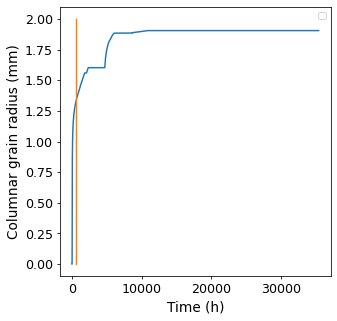

In [35]:
data = np.loadtxt('SD_iFGDcoeff = 8/time/section 4/columnar radius.dat', converters={1: lambda s: s.replace(b'D', b'E')})

fig, (ax1) = plt.subplots(1, figsize=(5,5))
ax1.plot(data[:,0],data[:,1], linewidth=1.5)
ax1.plot(np.linspace(500,500,1000), np.linspace(0,2,1000))
ax1.set_ylabel('Columnar grain radius (mm)',fontsize=14)
ax1.set_xlabel('Time (h)',fontsize=14)
#ax1.set_ylim([, ]) 
ax1.tick_params(axis='y', labelsize=13)
ax1.tick_params(axis='x', labelsize=13)
ax1.legend()
plt.savefig('plot/columnar grain radius - time.pdf',bbox_inches='tight')



## **NuFuel plot**

In [16]:
#Import Excel
data=pd.read_excel("SUPERFACT data.xlsx", sheet_name = 'SF16')
experimental_coordinate  = pd.DataFrame(data.loc[:,'experimental_radius'])[0:27]
experimental_xenon  = pd.DataFrame(data.loc[:,'experimental_xenon'])[0:27]

#Import TU 
# sd = np.loadtxt(open('TU - SCIANTIX 2.0 - SD/xenon.dat','rt').readlines()[4:4+43], converters={1: lambda s: s.replace(b'D', b'E')} )
# cylinder = np.loadtxt(open('TU - SCIANTIX 2.0 - cylinder/xenon.dat','rt').readlines()[4:4+43], converters={1: lambda s: s.replace(b'D', b'E')} )
# switch = np.loadtxt(open('TU - SCIANTIX 2.0 - switch/xenon.dat','rt').readlines()[4:4+43], converters={1: lambda s: s.replace(b'D', b'E')} )

# xVars_sd = sd[0:43,0]/1000      
# yVars_sd = sd[0:43,1]

# xVars_cylinder = cylinder[0:43,0]/1000       
# yVars_cylinder = cylinder[0:43,1]

# xVars_switch = switch[0:43,0]/1000       
# yVars_switch = switch[0:43,1]

# sd = np.loadtxt(open('TU - SCIANTIX 2.0 - SD/columnar radius.dat','rt').readlines()[3:3+10], converters={1: lambda s: s.replace(b'D', b'E')} )
# cylinder = np.loadtxt(open('TU - SCIANTIX 2.0 - cylinder/columnar radius.dat','rt').readlines()[3:3+10], converters={1: lambda s: s.replace(b'D', b'E')} )

# sd_cylinder_radius = max(sd[:,1])

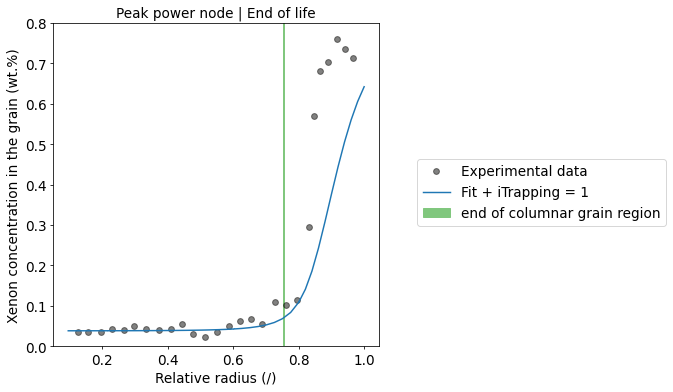

In [20]:
columnar_grain_radius = np.loadtxt(open('SD_iFGDcoeff = 1/axial/columnar radius.dat','rt').readlines()[3:3+10], converters={1: lambda s: s.replace(b'D', b'E')} )
sd_fit = np.loadtxt(open('SD_iFGDcoeff = 8/radius/section 4/xenon.dat','rt').readlines()[4:4+43], converters={1: lambda s: s.replace(b'D', b'E')} )

plt.figure(figsize=(6,6))
plt.plot(experimental_coordinate, experimental_xenon, 'o', label='Experimental data', color= '#050402', alpha=0.5)
plt.plot((sd_fit[:,0])/sd_fit[-1,0],sd_fit[:,1], label = 'Fit + iTrapping = 1')

#plt.plot(xVars_sd/xVars_sd[-1],yVars_sd, label='spectral diffusion algorithm with 40 modes', color='#f29838')
#plt.plot(xVars_sd/xVars_sd[-1],yVars_sd, label='State-of-the-art algorithm', color='#f29838')
#plt.plot(xVars_cylinder/xVars_cylinder[-1],yVars_cylinder, label='Reduced order model for cylindrical grains')
#plt.plot(xVars_switch/xVars_switch[-1],yVars_switch, '--', label='reduced order model for cylindrical grains with 10 modes + spectral diffusion', color='#0449f5')
#plt.plot(xVars_switch/xVars_switch[-1],yVars_switch, '--', label='Reduced order model', color='#0449f5')

plt.xlabel('Relative radius (/)', fontsize=14)
plt.ylabel('Xenon concentration in the grain (wt.%)', fontsize=14)
plt.title('Peak power node | End of life',fontsize=14)
plt.ylim(0, 0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.axvspan((2.7/2)/2.71, (2.7/2)/2.71+0.001, color='#80c77d', label='end of columnar grain evaluated with PIEs')
plt.axvspan(max(columnar_grain_radius[:,1])/2.71, max(columnar_grain_radius[:,1])/2.71+0.001, color='#80c77d', label='end of columnar grain region') ##9d8ff0

plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.6), fancybox=True, shadow=False, ncol=1, fontsize=14)

plt.savefig('Plot/result.pdf', bbox_inches="tight")

### **alphaD for Matzke**

In [57]:
import sympy as sp # Per i symbol
T=sp.Symbol('T')
matzke = 5e-8*sp.exp(-40262/T) 
alphaD = matzke.diff(T)
print(alphaD)
print(5e-8*40262)

0.0020131*exp(-40262/T)/T**2
0.0020131


In [1]:
print((0.48/3.49))

0.13753581661891115


### **alphaD for fit White 2001**

In [5]:
import sympy as sp # Per i symbol
T=sp.Symbol('T')
fit_white = 2.949513e-13*sp.exp(-20487.36244/T) 
alphaD = fit_white.diff(T)
print(alphaD)
print(2.949513e-13*20487.36244)

6.04277418524917e-9*exp(-20487.36244/T)/T**2
6.042774185249173e-09
